# Ciencia de Datos
## 2º Cuatrimestre de 2017

## Módulo 4 - Redes Complejas

## Integrantes:

- Fernández, Esteban - 691/12 - esteban.pmf@gmail.com
- Beccar García, Augusto - 267/13 - abg101@gmail.com
- Fadel, Uriel - 104/14 - urielfadel@gmail.com


## Introducción

En el mundo real se presentan varios fenómenos y agrupamiento que se pueden describir como una red donde se conectan varios sujetos que mantienen alguna relación entre ellos. El mas conocido y evidente es el de las redes sociales, en las cuales la relación es la amistad o conocimiento que se tenga entre dos personas. A partir de esto se construyen redes complejas en las cuales queremos estudiar ciertas propiedades que nos pueden ser de utilidad a la hora de describir algunos estructuras relacionales del mundo.

Para ello nos basamos en la teoría de grafos. La red es un conjunto de nodos y un conjunto de ejes que conectan esos nodos (pares no ordenados). Deseamos poder calcular nociones como la del grado de agrupamiento de los nodos que nos dan una pauta de la cercanía indirecta entre ellos, así como también las longitudes de los caminos mínimos entre los mismos. Esto sumado al análisis del grado (cantidad de vecinos) de los vértices nos pueden orientar a aproximar un nivel de separación entre ellos, esto es, por cuántos debemos atravesar para llegar a otro, asi como también si se trata de un grafo de mundo pequeño caraterizado por un gran nivel de agrupamiento.

En el presente trabajo hacemos uso de estas técnicas para observar qué forma posee la red de un conjunto de físicos que colaboran en publicaciones científicas. La coautoría define su relación de conectividad. Creemos que puedan haber pocos físicos con gran experiencia en el área y varias colaboraciones a los cuales muchos son coautores de allegados a ellos presentando un aceptale nivel de clustering y una forma de mundo pequeño.  

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import welch
import scipy.stats
import math
import collections
import csv
import networkx as nx
from random import choice
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Instalacion de la libreria networkx en las maquinas del labo

#import pip3
#pip3.main(['install', '--user', 'networkx'])


## 1- Creación del Grafo

Mostramos la cantidad de nodos y ejes una representación gráfica del grafo.

In [3]:

#matr = []
g = nx.Graph()
with open('data.csv', 'r') as f:
   reader = csv.reader(f,delimiter=',')
   for row in reader:
       x = (row[3].strip().split('&'))
       linea = []
       for auth in x:
          linea.append(auth.strip())
       g.add_nodes_from(linea)
       for i in range(len(linea)):
           for j in range(i+1,len(linea)):
               g.add_edge(linea[i],linea[j])
                
print("Cantidad de nodos: " + str( g.number_of_nodes()))
print("Cantidad de ejes: " + str(g.number_of_edges()))



Cantidad de nodos: 3998
Cantidad de ejes: 7880


# Grafico del grafo

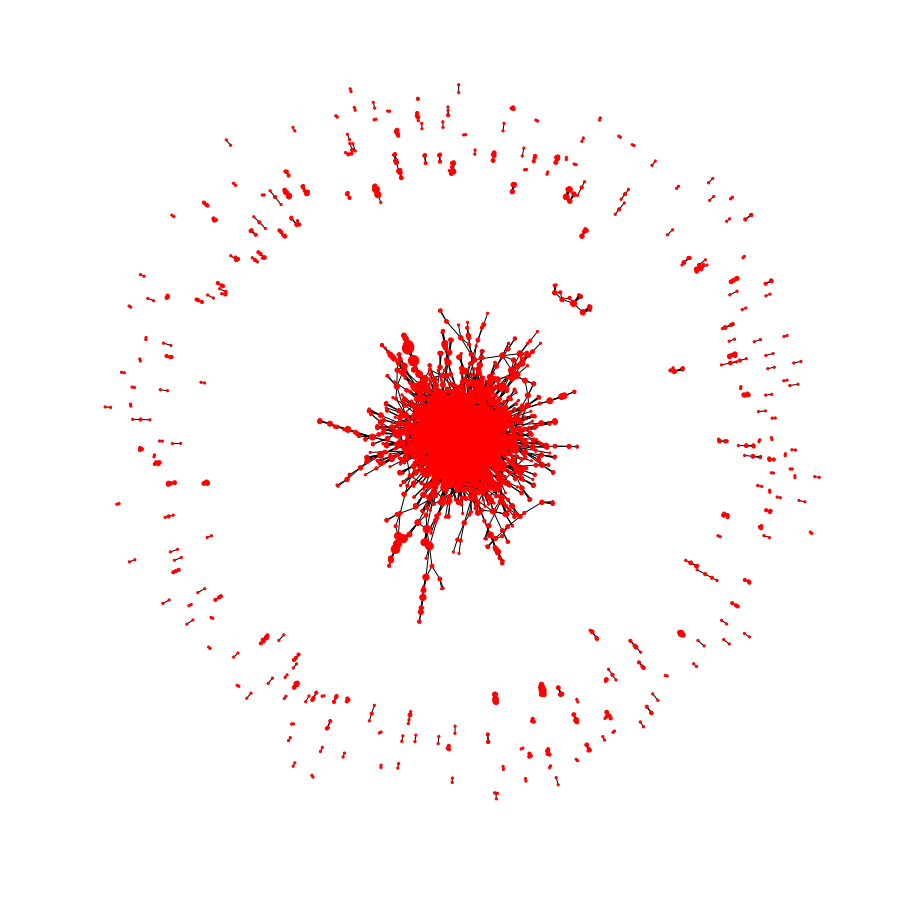

In [8]:
# GRAFICAR
d = nx.degree(g)
plt.figure(3,figsize=(12,12)) 
nx.draw(g,font_size=8 ,nodelist=d.keys(), node_size=[v * 5 for v in d.values()])

## 2-  Distribución de Grado

Graficamos la distribución del número de colaboraciones de los autores. Primero realizamos un histograma, ilustrando la cantidad de autores con cierto número de colaboraciones y luego pasamos a escala logaritma ambos ejes y el eje y (cantidad de autores con cierto número de colaboraciones) respectivamente.

(1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 2, 7, 9, 8, 8, 7, 10, 23, 10, 29, 32, 39, 41, 32, 72, 84, 110, 133, 188, 284, 361, 560, 803, 829, 300)


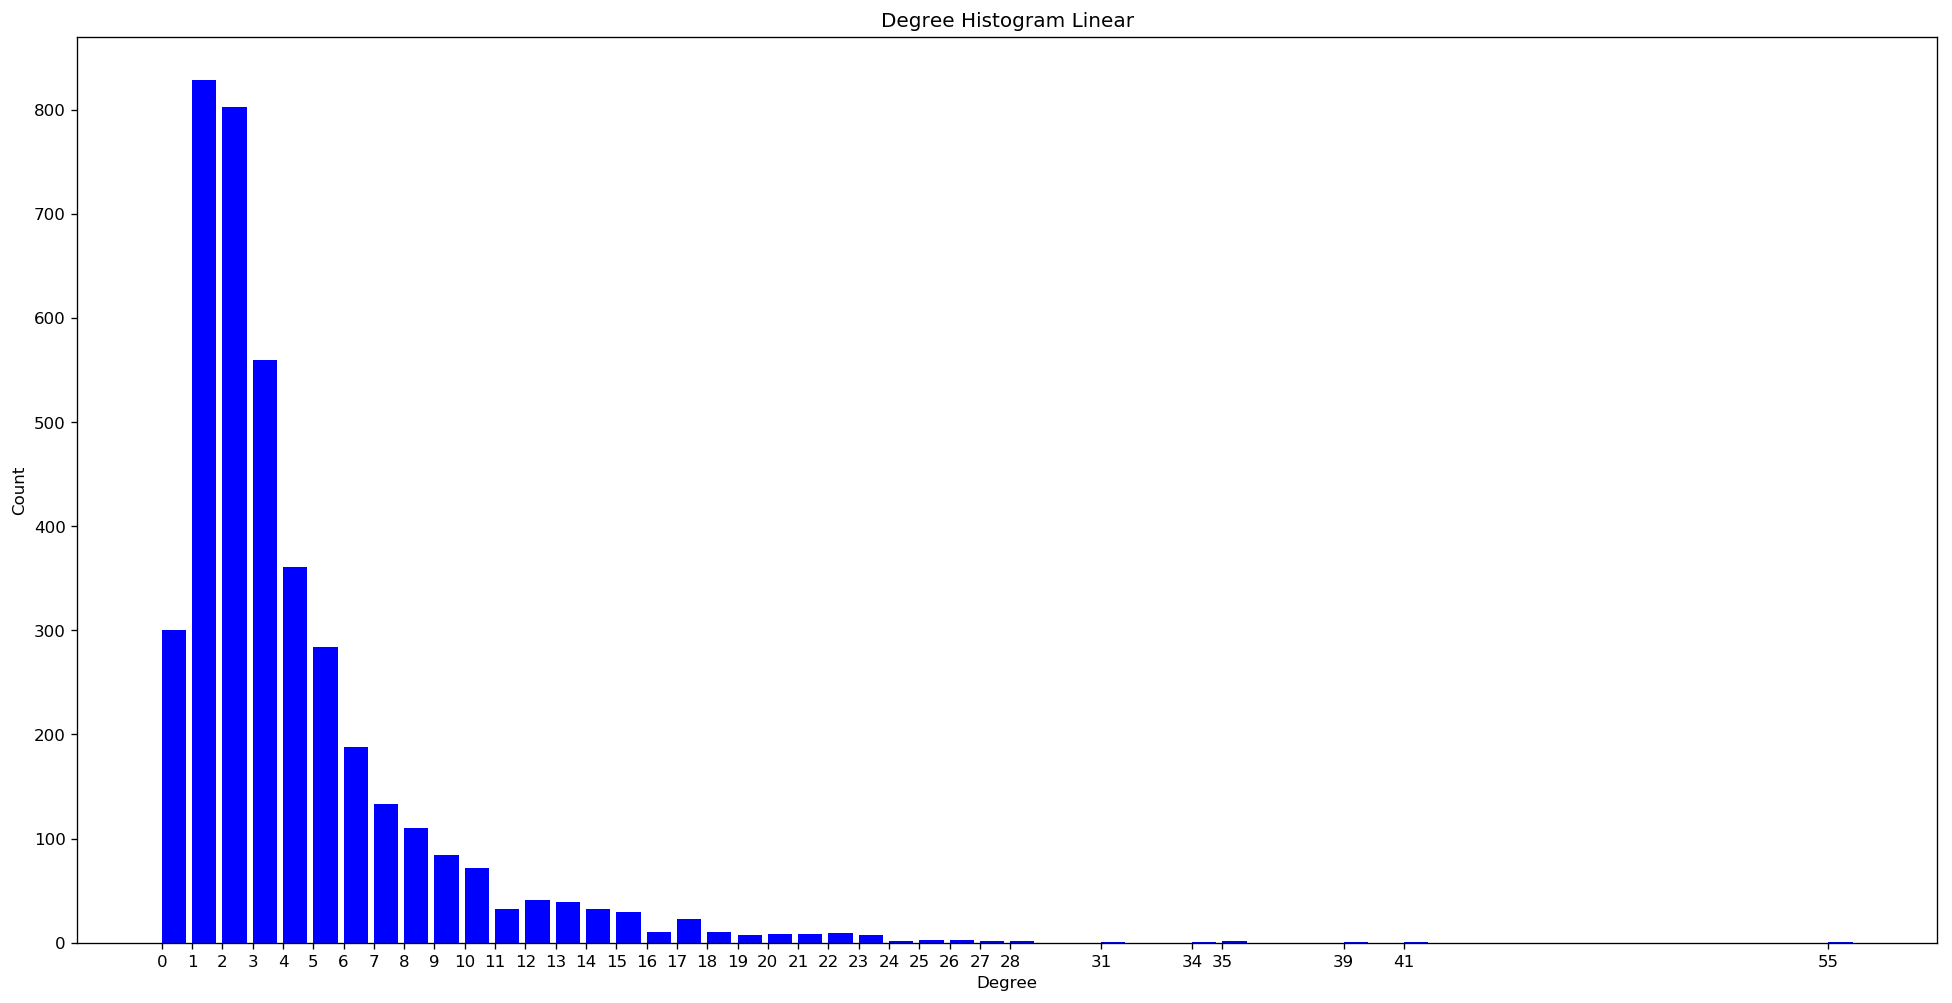

In [121]:
#HISTOGRAMA DE GRADOS

histograma = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence

#histograma = list(filter(lambda x: x > 0, histograma))
#print(histograma)


degreeCount = collections.Counter(histograma)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(20, 10),dpi=120) 
plt.bar(deg, cnt, width=0.8, color='b', align='edge')


plt.title("Degree Histogram Linear")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(deg)

print(cnt)

plt.show()

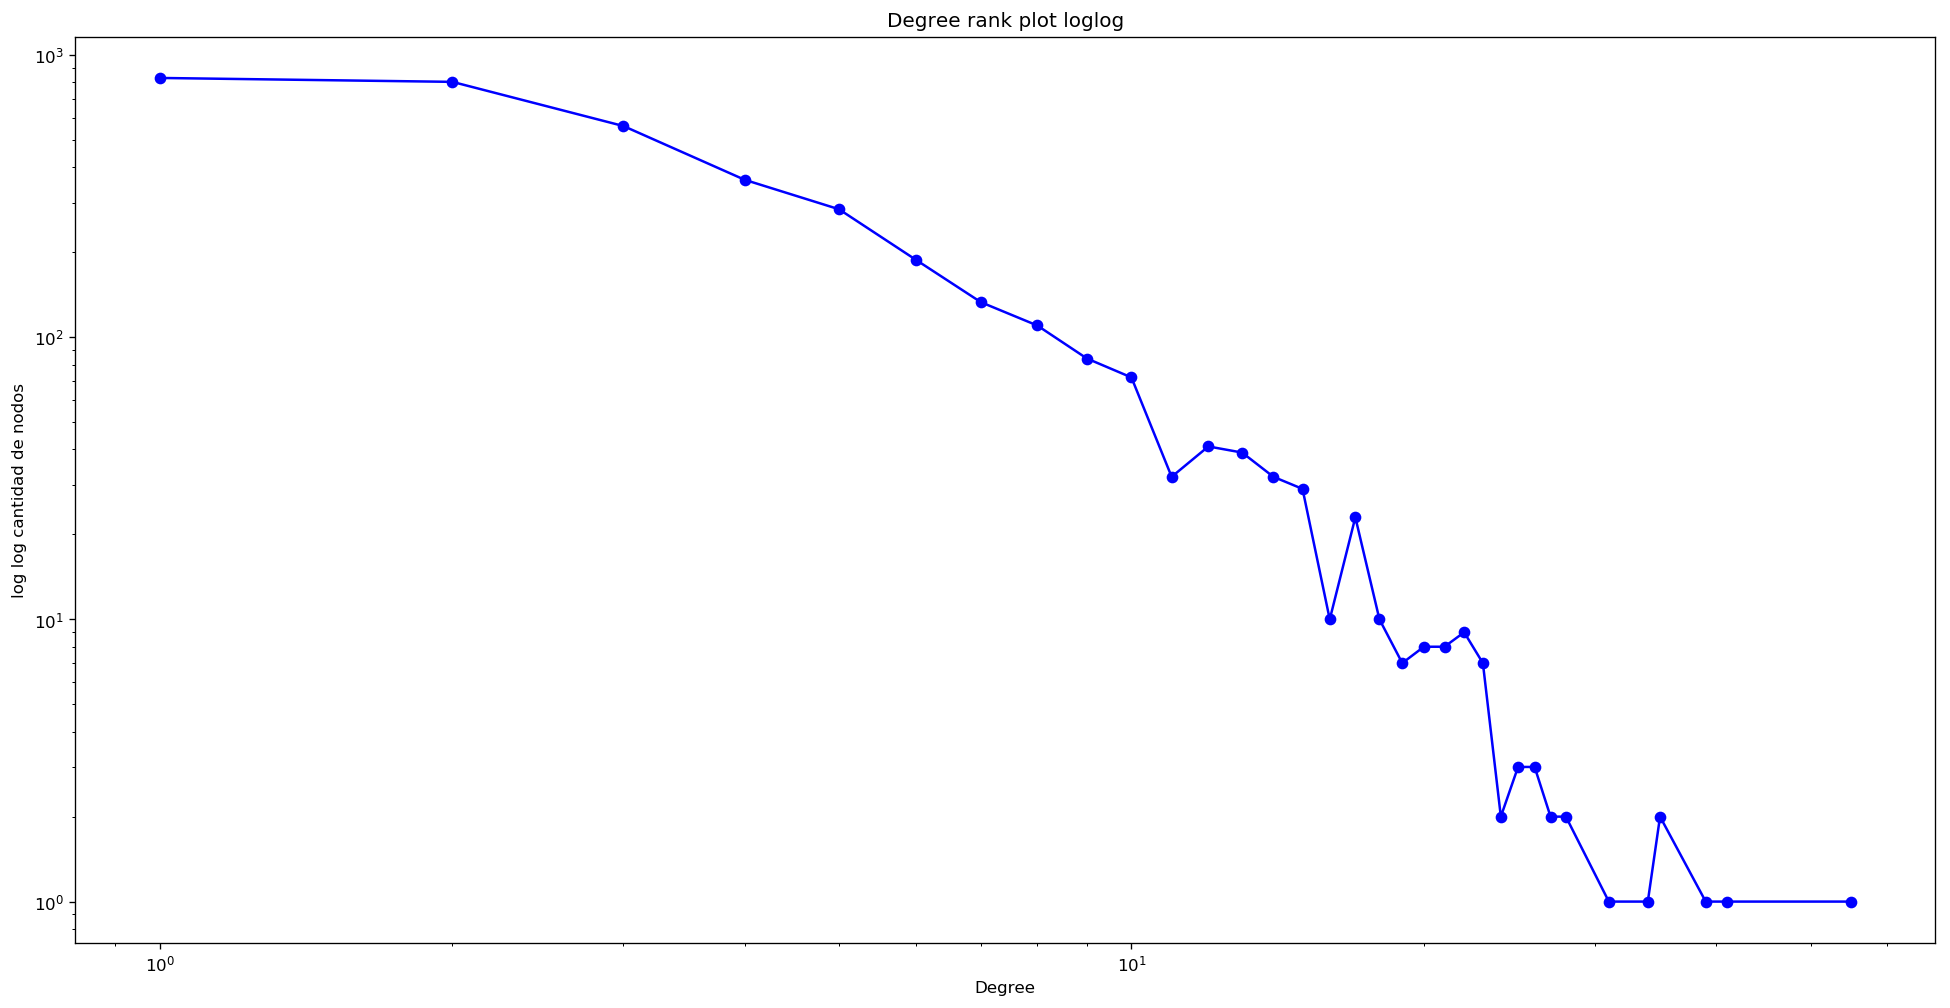

In [125]:
plt.figure(figsize=(20, 10),dpi=120) 
plt.loglog(deg,cnt,'b-',marker='o')
plt.title("Degree rank plot loglog")
plt.ylabel("log log cantidad de nodos")
plt.xlabel("Degree")
plt.show()

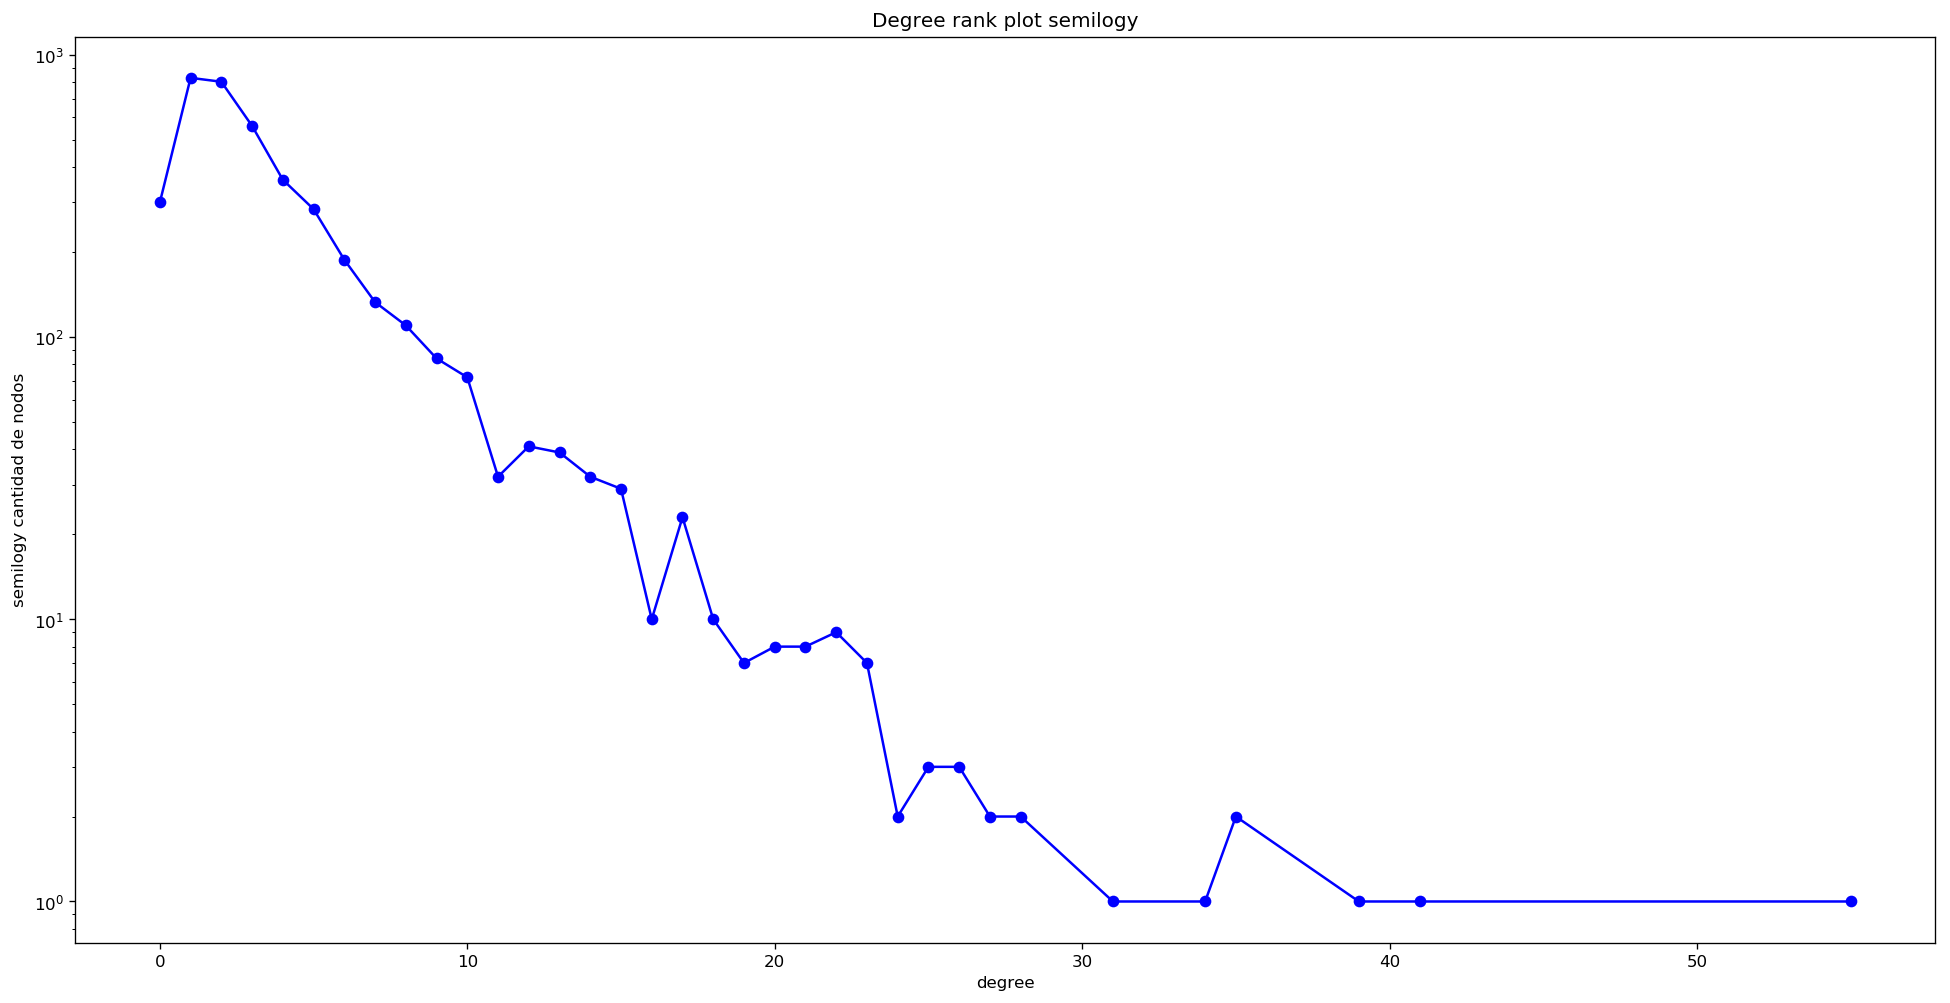

In [126]:
##EXPONENCIAL
plt.figure(figsize=(20, 10),dpi=120) 
plt.semilogy(deg,cnt,'b-',marker='o')
plt.title("Degree rank plot semilogy")
plt.ylabel("semilogy cantidad de nodos")
plt.xlabel("degree")
plt.show()

En el histograma vemos que muchos físicos colaboran entre 1 y 3 veces por trabajo y la cantidad de físicos que colaboran con varios decrece en el número de colaboraciones. Se puede ver que un científico ha publicado junto a otros 55.

Por otra parte, al aplicarle logaritmo al eje y podemos ver que nos queda una función que tiende a ser lineal con lo que podemos estimar que la distribución de los grados se aproxima más a una exponencial que a una distribución de ley de potencia dado que la aplicación del logaritmo en ambas ejes redunda en una función sublineal por lo que parece descartar que se trate de una distribución de ley de potencia.

## Ejercicio 3 - Componentes conexas

Calculamos el número de componentes conexas del gráfico y el tamaño de la mayor componente conexa.

In [340]:
connected_component_subgraphs = list(nx.connected_component_subgraphs(g))
print("Connected component subgraphs count: " + str(len(connected_component_subgraphs)))

gc = max(connected_component_subgraphs,key=len)
print("Max connected component subgraphs nodes count: " + str(gc.number_of_nodes()))
print("Max Connected component subgraphs edges count: " + str(gc.number_of_edges()))


Connected component subgraphs count: 536
Max connected component subgraphs nodes count: 3018
Max Connected component subgraphs edges count: 7269


Observamos que la componente conexa más grande abarca casi todos los nodos y ejes del grafo, lo que da una pauta de la conexión existente en la comunidad de físicos. Podemos decir que la mayoria colabora con alguien perteneciente a cierto establishment científico.

## Ejercicio 4 - Tamaños de Vecindades

Tomando nodos al azar de la mayor componente conexa, queremos ver en cuantos pasos podemos llegar a abarcar a todos los nodos y cuántos nuevos autores va alcanzando en cada paso.

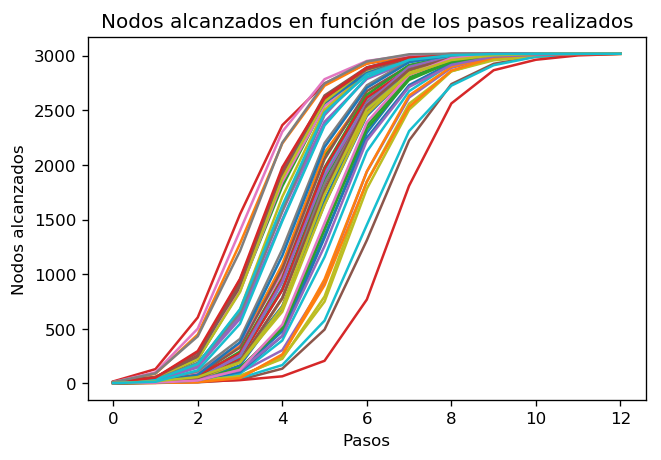

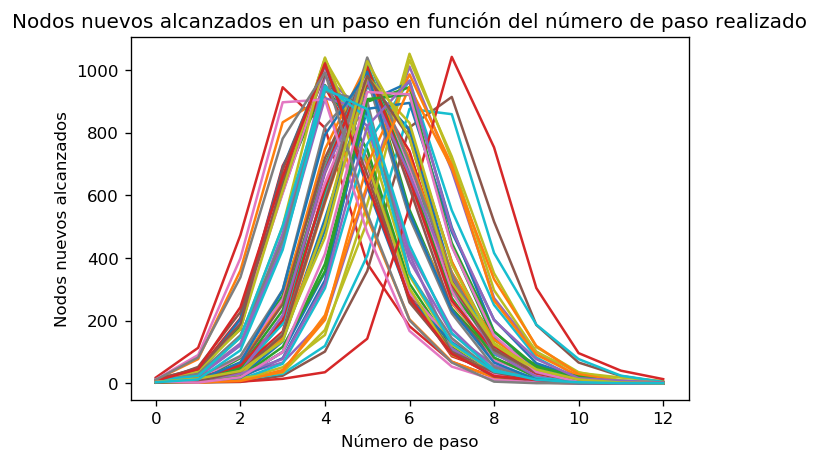

Maxima cantida de nodos que se agregan en cada paso = 1052.0


In [136]:
gc = max(nx.connected_component_subgraphs(g), key=len)

pasos = 13
cant_nodos = 60

all_res_authors_by_jump = np.zeros((cant_nodos,pasos))
all_res_authors_count_difference_by_jump = np.zeros((cant_nodos,pasos))

for j in range(0, cant_nodos):
    random_node = choice(list(gc.nodes))
    neighbors = {random_node}
    res = np.zeros(pasos)
    res2 = np.zeros(pasos)
    for i in range(0, len(res)):
        for node in neighbors:
            current_node_neighbors = set(gc.neighbors(node))
            neighbors = neighbors.union(current_node_neighbors)
            res[i] = len(neighbors)
            if i == 0:
                res2[i] = res[i]
            else:
                res2[i] = res[i] - res[i-1]

    all_res_authors_by_jump[j] = res
    all_res_authors_count_difference_by_jump[j] = res2
    
plt.subplots(dpi=120)
for aut_by_jump in all_res_authors_by_jump:
    plt.plot(aut_by_jump)

plt.title("Nodos alcanzados en función de los pasos realizados")
plt.ylabel("Nodos alcanzados")
plt.xlabel("Pasos")    
plt.show()

plt.subplots(dpi=120)
for aut_by_count_dif in all_res_authors_count_difference_by_jump: 
    plt.plot(aut_by_count_dif)

plt.title("Nodos nuevos alcanzados en un paso en función del número de paso realizado")
plt.ylabel("Nodos nuevos alcanzados")
plt.xlabel("Número de paso")      
plt.show()

print("Maxima cantida de nodos que se agregan en cada paso = " + str(np.max(all_res_authors_count_difference_by_jump)))


Se puede apreciar que cerca de los 6 pasos casi todos han alcanzo la mayoria de los autores de la componente conexa más grande y para el paso 10 todos los probados lo han logrado. El fenómeno de los 6 grados de separación plantea que los humanos estamos a una distancia promedio de 6 personas unos con otros. Por ejemplo, si necesitamos enviar una carta a otra persona cualquiera, enviandola en cada paso a un conocido que pueda hacer llegar la misma a destino, en promedio dicha carta cambia 6 veces de mano.

En nuestro caso, los físicos parecen estar a una distancia de a lo sumo 10 colaboraiciones entre si. Si bien la distancia es un 60% más que la planteada por el fenómeno de los seis grados de separación, creemos que sigue resultando una medida pequeña para un componente conexa de tres mil autores.

Por otro lado, en el segundo gráfico notamos una parábola en la medida de cuantos nuevos autores se conocen en cada paso cuyo máximo se obtiene entorno al sexto paso y es 1052. Los sucesivos paos agregan una cantidad de autores nuevos decreciente.Entre el tercer y octavo salto es cuando se conocen más personas. Tambien notamos que el máximo suele ser bastante mayor al resto.
Si bien desde un autor tomado al azar no se llegan a conocer a todos los demás en seis saltos, sí se llega a conocer a la mayoría de ellos, aproximandose a la noción de los seis grados de separación y la de mundo pequeño que analizamos a continuación.

## 5 - Mundos Pequeños

En la anterior experimentación analizamos cuántos saltos son necesarios para que un autor conozco a todos los demás y cuánto aporta cada paso a medida que avanza.

A small-world network is a type of mathematical graph in which most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps. Specifically, a small-world network is defined to be a network where the typical distance L between two randomly chosen nodes (the number of steps required) grows proportionally to the logarithm of the number of nodes N in the network, that is

En este experimentación vemos si este grafo, en particular la componente conexa más grande, se trata de uno de mundo pequeño, esto es una red en la cual la mayoría de los nodos no son vecinos entre sí pero que es muy probable que los vecinos de cualquier par de nodos sí lo sean y donde cada nodo puede llegar a otro en pocos saltos. Dicha estructura es la encontrada a menudo en diversas redes socailes. En el caso que nos atañe, buscamos observar si cada par de autor se encuentra a pocas colaboraciones.

Para medir esto calculamos el coeficiente de Clusterin C de la mayor componente conexa. Dicho coeficiente es una medida de cuan agrupado están los autores. La fórmula surge de calcular el número de triángulos (relaciones de transitividad) de la componente conexa multiplicada por tres (puesto que cada triángulo incide a tres nodos) y dividirlo por la cantidad de posibles conexiones que se pueden formar entre vecinos de un nodo para cada nodo. Por ejemplo, si un nodo A es veicno de los nodos B,C y D, la cantidad de posibles triadas es 3 (ABC, ADC, ADB).

Además calculamos la longitud promedio del camino mínimo entre dos nodos cualquiera. Luego lo comparamos con un grafo generado al azar con una distribución de grados similar a dicha componente conexa.

In [341]:
coeficiente_de_clustering = nx.transitivity(gc)
distancia_promedio = nx.average_shortest_path_length(gc)

print("Coeficiente de Clustering C: "+ str(coeficiente_de_clustering))
print("Longitud promedio del camino mínimo entre dos nodos cualquiera: "+ str(distancia_promedio))

Coeficiente de Clustering C: 0.28748784553410195
Longitud promedio del camino mínimo entre dos nodos cualquiera: 6.131037221593651


In [342]:

# Difentes generadores que no daban grafo conexo. Despues se borra.
######################################

#histograma = sorted([d for n, d in gc.degree()])  # degree sequence

#print(nx.degree_histogram(gc))
#histograma = list(filter(lambda x: x > 0, histograma))
#print(histograma)


#degreeCount = collections.Counter(histograma)
#deg, cnt = zip(*degreeCount.items())

#print(histograma)

#buen clustering pero no genera misma cantida de ejes
#random_graph=nx.degree_seq.expected_degree_graph(histograma,selfloops=False,create_using = nx.Graph(),seed=165486463)

#misma cantida de ejes mal clustering
#random_graph = nx.random_degree_sequence_graph(histograma) 

#no conexo
#random_graph = nx.havel_hakimi_graph(histograma)
#while not(nx.is_connected(random_graph)):
#    random_graph = nx.havel_hakimi_graph(histograma)

#ejes int(2*gc.number_of_edges()/gc.number_of_nodes())

#random_graph = nx.dense_gnm_random_graph(gc.number_of_nodes(),gc.number_of_edges(),seed=84486545)
#random_graph = nx.configuration_model(histograma, create_using = gc)

#random_graph = nx.degree_sequence_tree(histograma,create_using = gc)

#random_graph = nx.degree_seq.configuration_model(histograma, create_using = str(Graph))

#histograma_random = sorted([d for n, d in random_graph.degree()], reverse=True)
#print(random_graph.number_of_nodes())
#print(random_graph.number_of_edges())
#print(nx.is_connected(random_graph))
#print(nx.degree_histogram(random_graph))

########################################################################################################

random_graph = nx.connected_watts_strogatz_graph(gc.number_of_nodes(),k = int(2*gc.number_of_edges()/gc.number_of_nodes()),p = 0.5)

random_C = nx.transitivity(random_graph)
random_len = nx.average_shortest_path_length(random_graph)
small_world_coeficiente = (coeficiente_de_clustering/random_C)/(distancia_promedio/random_len)

print("Coeficiente de Clustering C de Grafo Random: "+ str(random_C))
print("Longitud promedio del camino mínimo entre dos nodos cualquiera Grafo Random: " + str(random_len))
print("Small World Coeficient: " + str(small_world_coeficiente))

Coeficiente de Clustering C de Grafo Random: 0.05497690871573155
Longitud promedio del camino mínimo entre dos nodos cualquiera Grafo Random: 6.558334448067972
Small World Coeficient: 5.5936949586385465


El coeficiente de Clustering C de la componente conexa más grande del grafo analizado es 0.28. Considerando que 1 es el coeficiente del grafo completo no parece tan grande. Sin embargo la distancia promedio entre dos nodos cualquiera es de 6.13. Esto parecería indicar que estamos en presencia de un grafo de mundo pequeño y que el grado de separación entre dos autores de la componente es de seis tal como describe el fenómeno del experimento anterior.

Para concluir este inciso, generamos un grafo al azar y comparamos su coeficiente de clustering y su longitud media del caminimo mínimo centre dos nodos con la de la componente conexa. Puesto que el la relación entre ambas respectivas variables es mayor a 1 podemos decir que la componente conexa es un grafo de mundo pequeño.

## 6 - Estrellas

Por último analizamos los autores estrellas en este campo de la física. Para ello utilizamos dos métricas: la de mayor grado y la menor distancia promedio con todos los demás nodos. Buscamos observar qué sucede si se los quita del grafo.

In [349]:
### Aca calculamos los caminos mínimos promedio

grafo = g.copy()

connected_component_subgraphs = list(nx.connected_component_subgraphs(grafo))
print("Connected component subgraphs count: " + str(len(connected_component_subgraphs)))

mcc = max(connected_component_subgraphs,key=len)
#for cc in connected_component_subgraphs:
#   print("Max connected component subgraphs nodes count: " + str(cc.number_of_nodes()))
#   print("Max Connected component subgraphs edges count: " + str(cc.number_of_edges()))

#caminos_minimo = dict(nx.shortest_path_length(mcc))
#print(caminos_minimo[0][1])
#for autor in range(mcc.number_of_nodes()):
#    print(np.mean(caminos_minimo[autor][:]))
#print()
    

Connected component subgraphs count: 536


In [8]:
### Calculo en función del grado. Vamos sacando los de mayor grado.

def second(t):
    return t[1]

def first(t):
    return t[0]

print("Cantidad de nodos originalmente: " + str(g.number_of_nodes()))
print("Cantidad de aristas originalmente: " + str(g.number_of_edges()))
connected_component_subgraphs = list(nx.connected_component_subgraphs(g))
print("Cantidad de componentes conexas: " + str(len(connected_component_subgraphs)))
print ("\n \n")


grafo = g.copy()
connected_components = list(nx.connected_component_subgraphs(grafo))
mcc = max(connected_components,key=len)
i=0
estrella=[]
print("Estrellas - Harmonic Centrality: ")
cbc = nx.harmonic_centrality(mcc)
nodes = cbc.keys()
vals = cbc.values()
shortest_path_betweenness_centrality =  sorted(zip(nodes, vals), reverse = True, key = second)
while nx.is_connected(mcc):
    if mcc.has_node(first(shortest_path_betweenness_centrality[i])):
        print shortest_path_betweenness_centrality[i]
        estrella.append(shortest_path_betweenness_centrality[i])
        mcc.remove_node(first(shortest_path_betweenness_centrality[i]))
        grafo.remove_node(first(shortest_path_betweenness_centrality[i]))
    i=i+1

print("Cantidad de nodos luego de extraccion de estrella: " + str(grafo.number_of_nodes()))
print("Cantidad de aristas luego de extraccion de estrella: " + str(grafo.number_of_edges()))
connected_component_subgraphs = list(nx.connected_component_subgraphs(grafo))
print("Cantidad de componentes conexas: "  + str(len(connected_component_subgraphs)))
################

grafo = g.copy()
degrees = grafo.degree()
los_grados = sorted(zip(degrees.keys(), degrees.values()), reverse = True, key = second)

connected_components = list(nx.connected_component_subgraphs(grafo))
mcc = max(connected_components,key=len)

#for i in k:
#cuantos_saco = 350
#grafo.remove_nodes_from([first(nodo) for nodo in los_grados[:cuantos_saco] ])

i=0
estrella=[]
while nx.is_connected(mcc):
    if mcc.has_node(first(los_grados[i])):
        estrella.append(los_grados[i])
        mcc.remove_node(first(los_grados[i]))
        grafo.remove_node(first(los_grados[i]))
    i=i+1

print("Estrellas - Grado: " + str(estrella))

print("Cantidad de nodos luego de extraccion de estrella: " + str(grafo.number_of_nodes()))
print("Cantidad de aristas luego de extraccion de estrella: " + str(grafo.number_of_edges()))
print ("\n \n")

################

grafo = g.copy()
connected_components = list(nx.connected_component_subgraphs(grafo))
mcc = max(connected_components,key=len)
i=0
estrella=[]
print("Estrellas - Betweeness Centrality: ")
spbt = nx.betweenness_centrality(mcc)
nodes = spbt.keys()
vals = spbt.values()
shortest_path_betweenness_centrality =  sorted(zip(nodes, vals), reverse = True, key = second)
while nx.is_connected(mcc):
    if mcc.has_node(first(shortest_path_betweenness_centrality[i])):
        print shortest_path_betweenness_centrality[i]
        estrella.append(shortest_path_betweenness_centrality[i])
        mcc.remove_node(first(shortest_path_betweenness_centrality[i]))
        grafo.remove_node(first(shortest_path_betweenness_centrality[i]))
    i=i+1

print("Cantidad de nodos luego de extraccion de estrella: " + str(grafo.number_of_nodes()))
print("Cantidad de aristas luego de extraccion de estrella: " + str(grafo.number_of_edges()))



connected_component_subgraphs = list(nx.connected_component_subgraphs(grafo))
print("Cantidad de componentes conexas: "  + str(len(connected_component_subgraphs)))


Cantidad de nodos originalmente: 3998
Cantidad de aristas originalmente: 7880
Cantidad de componentes conexas: 536

 

Estrellas - Harmonic Centrality: 
('Lee', 831.8170634920759)
Cantidad de nodos luego de extraccion de estrella: 3997
Cantidad de aristas luego de extraccion de estrella: 7826
Cantidad de componentes conexas: 540
Estrellas - Grado: [('Lee', 55)]
Cantidad de nodos luego de extraccion de estrella: 3997
Cantidad de aristas luego de extraccion de estrella: 7826

 

Estrellas - Betweeness Centrality: 
('Lee', 0.07571935581356912)
Cantidad de nodos luego de extraccion de estrella: 3997
Cantidad de aristas luego de extraccion de estrella: 7826
Cantidad de componentes conexas: 540


In [16]:
mcc = max(connected_component_subgraphs,key=len)
print("Max connected component subgraphs nodes count: " + str(mcc.number_of_nodes()))
print("Max Connected component subgraphs edges count: " + str(mcc.number_of_edges()))

Max connected component subgraphs nodes count: 3013
Max Connected component subgraphs edges count: 7215


Para desconectar la componente conexa más grande solo hizo falta remover a Lee. Notamos que Lee es el autor central entre las 4 componentes conexas que conforman la máxima componente conexa del grafo, y, a partir de los caminos que atraviesen por este, se pueden alcanzar todos los nodos de dicha componente.